# Random Forest Classification


In [2]:
# Importing the dataset
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[3:5]

In [3]:
# Encoding the target feature as factor
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

In [4]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [5]:
head(training_set)

,Age,EstimatedSalary,Purchased
1,19,19000,0
3,26,43000,0
6,27,58000,0
7,27,84000,0
8,32,150000,1
10,35,65000,0


In [6]:
# Feature Scaling
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

In [7]:
head(test_set)

,Age,EstimatedSalary,Purchased
2,-0.3041906,-1.5135434,0
4,-1.0599437,-0.3245603,0
5,-1.8156969,0.2859986,0
9,-1.2488820,-1.0957926,0
12,-1.1544129,-0.4852337,0
18,0.6405008,-1.3207353,1


In [8]:
# Fitting Random Forest Classification to the Training set
# install.packages('randomForest')
library(randomForest)
set.seed(123)
classifier = randomForest(x = training_set[-3],
                          y = training_set$Purchased,
                          ntree = 500)



randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [9]:
# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])

In [10]:
head(y_pred)

2  4  5  9 12 18 
 0  0  0  0  0  0 
Levels: 0 1

In [11]:
# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)

In [14]:
cm

   y_pred
     0  1
  0 56  8
  1  7 29

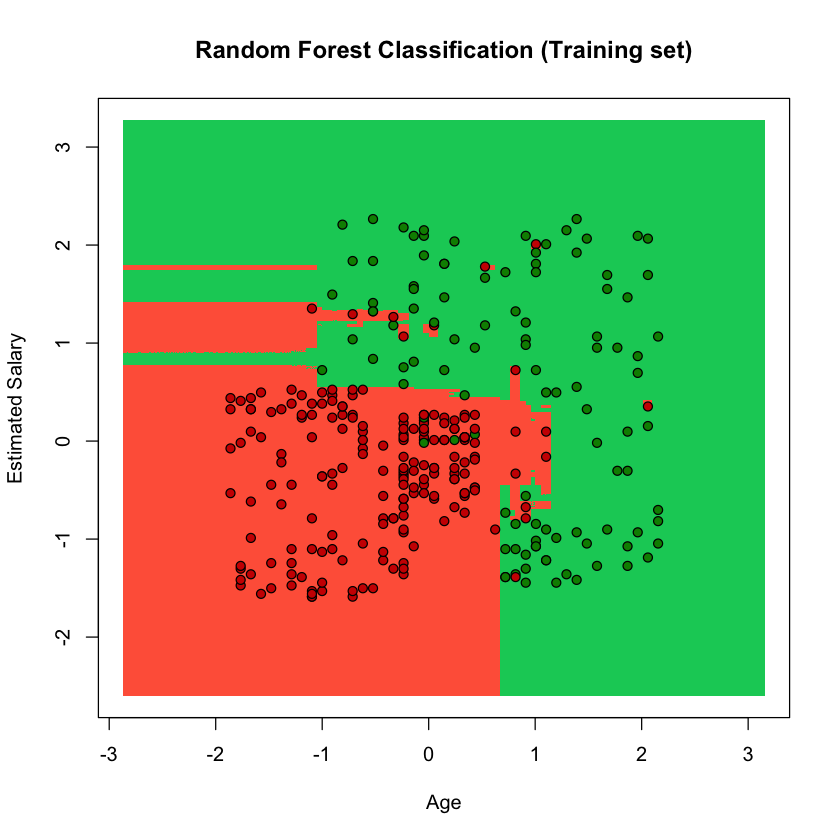

In [15]:
# Visualising the Training set results
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, grid_set)
plot(set[, -3],
     main = 'Random Forest Classification (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

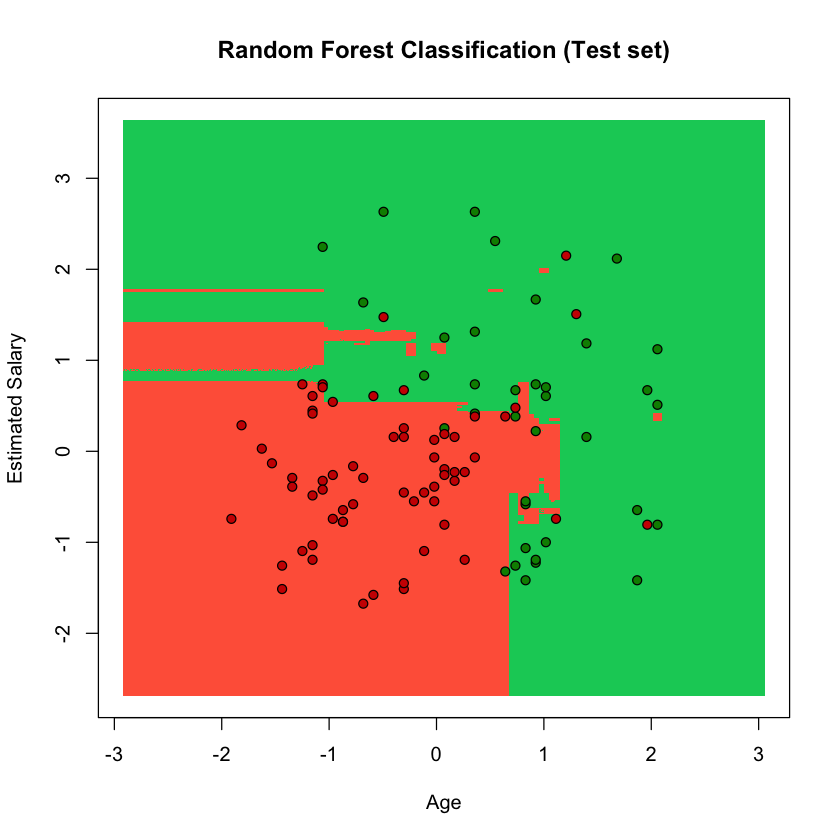

In [16]:
# Visualising the Test set results
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, grid_set)
plot(set[, -3], main = 'Random Forest Classification (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

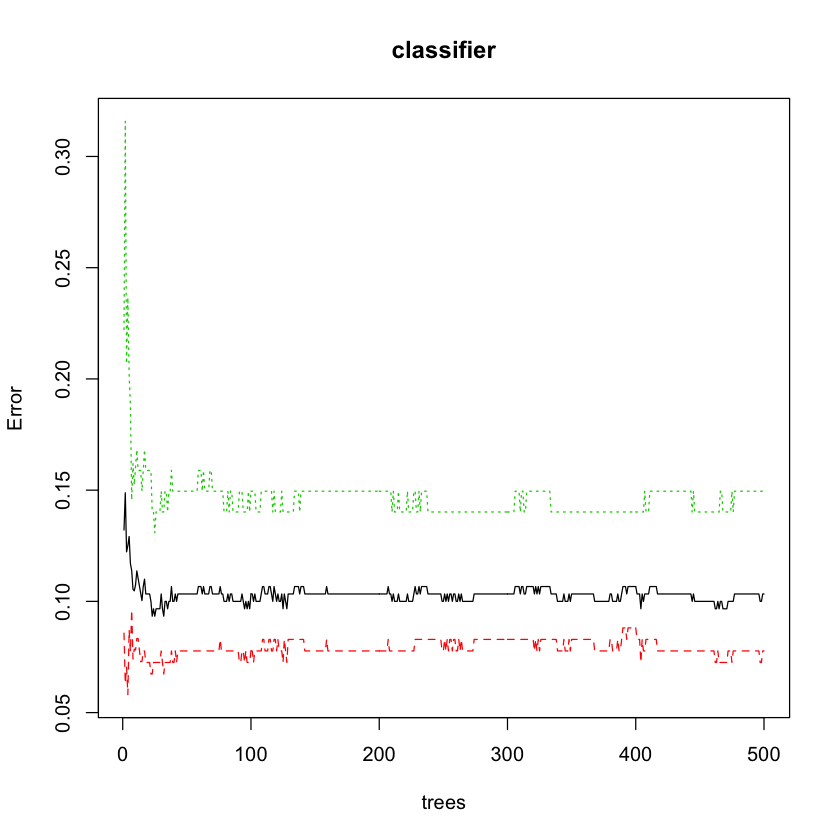

In [17]:
# Choosing the number of trees
plot(classifier)